<a href="https://colab.research.google.com/github/paladak/dw_matrix_road_sidn/blob/master/m3_day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score
import os
import datetime
%load_ext tensorboard
#reload_ext tensorboard
import matplotlib.pyplot as plt
from skimage import color, exposure

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
cd  "/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_3/dw_matrix_road_sign"

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_3/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
signs = pd.read_csv('data/dw_signnames.csv')
labels_dict = signs.to_dict()['b']

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential(
    
    [
     Conv2D(filters =64, kernel_size= (3,3), activation='relu',input_shape=input_shape),
     Flatten(),
     Dense(num_classes, activation='softmax')
    ]
)
  
def train_model(model, X_train, y_train, params_fit = {}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size = params_fit.get('batch_size', 128),
      epochs = params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data = params_fit.get('validation_data', (X_test, y_test)),
      callbacks=[tensorboard_callback]
      )
  return model


In [9]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 2s 7ms/step - loss: 33.0467 - accuracy: 0.7471 - val_loss: 1.4469 - val_accuracy: 0.7971
Epoch 2/5
272/272 [==============================] - 2s 6ms/step - loss: 0.2081 - accuracy: 0.9555 - val_loss: 1.5322 - val_accuracy: 0.8141
Epoch 3/5
272/272 [==============================] - 2s 6ms/step - loss: 0.1260 - accuracy: 0.9720 - val_loss: 1.9560 - val_accuracy: 0.8240
Epoch 4/5
272/272 [==============================] - 2s 6ms/step - loss: 0.1191 - accuracy: 0.9742 - val_loss: 2.0545 - val_accuracy: 0.8120
Epoch 5/5
272/272 [==============================] - 2s 6ms/step - loss: 0.0916 - accuracy: 0.9800 - val_loss: 2.2323 - val_accuracy: 0.8329


In [10]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

array([[3.2371738e-18, 4.8154753e-08, 7.5405242e-04, ..., 5.8157765e-03,
        4.6122227e-02, 1.0397030e-02],
       [1.3420632e-16, 6.0516044e-08, 3.1954591e-04, ..., 6.7173690e-02,
        3.8178476e-07, 7.8074733e-04],
       [3.6638360e-19, 3.6346854e-08, 6.9968490e-05, ..., 3.9908694e-04,
        4.8930338e-03, 2.3295488e-03],
       ...,
       [3.5084883e-04, 3.6836907e-03, 5.1543657e-03, ..., 4.0833830e-04,
        1.8534093e-04, 8.2211300e-05],
       [6.7736336e-04, 3.4875909e-03, 1.4327888e-03, ..., 7.5434614e-04,
        1.2725290e-03, 2.2639537e-05],
       [6.4035453e-06, 2.7158883e-04, 1.2317470e-04, ..., 1.7947443e-05,
        1.1093935e-04, 5.5123650e-07]], dtype=float32)

In [11]:
y_pred_prob[400]

array([1.08612341e-14, 9.99854445e-01, 1.41019520e-12, 2.99428582e-15,
       1.45509315e-04, 3.19795607e-10, 6.14824164e-21, 1.38634925e-17,
       3.61137956e-18, 3.86641713e-23, 2.91692364e-22, 3.06608729e-31,
       1.64614988e-15, 8.11584946e-21, 1.29868337e-32, 3.75699512e-22,
       4.38083331e-19, 0.00000000e+00, 8.23986988e-24, 0.00000000e+00,
       1.53851290e-22, 2.05713697e-33, 0.00000000e+00, 6.05052083e-21,
       3.36502440e-23, 2.49233085e-31, 3.00210976e-22, 7.40050468e-30,
       3.95831470e-25, 5.90842807e-19, 4.22486923e-33, 7.05320355e-32,
       3.84375149e-14, 6.14245389e-35, 1.52143752e-35, 3.72884823e-32,
       0.00000000e+00, 0.00000000e+00, 7.16644751e-36, 0.00000000e+00,
       3.29518669e-29, 2.06450873e-35, 1.14495045e-20], dtype=float32)

In [0]:
np.argmax(y_pred_prob[400])

1

In [12]:
np.sum(y_pred_prob[400])

0.99999994

<BarContainer object of 43 artists>

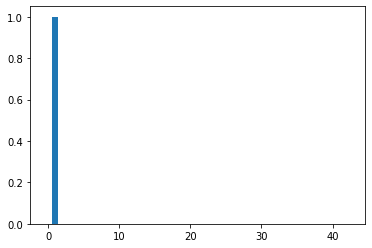

In [13]:
plt.bar(range(43), y_pred_prob[400])

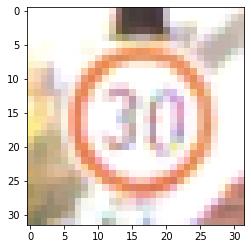

In [0]:
plt.imshow(X_test[400]);

In [0]:
def predict(model_trained, X_test, y_test, scoring = accuracy_score):
  y_test_norm =  np.argmax(y_test, axis = 1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis =1)

  return scoring(y_test_norm, y_pred)

In [18]:
predict(model_trained, X_test, y_test )

0.8328798185941043

In [0]:
 def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)



In [21]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential(
    
    [
     Conv2D(filters =32, kernel_size= (3,3), activation='relu',input_shape=input_shape),
     MaxPool2D(),
     Dropout(0.3),

     Conv2D(filters =64, kernel_size= (3,3), activation='relu'),
     MaxPool2D(),
     Dropout(0.3),

     Flatten(),
     
     Dense(1024, activation='relu'),
     Dropout(0.3),
     Dense(num_classes, activation='softmax')
    ]

)

train_and_predict(get_cnn_v2(input_shape, num_classes))
  



Epoch 1/5
272/272 [==============================] - 2s 7ms/step - loss: 6.3885 - accuracy: 0.2210 - val_loss: 1.9981 - val_accuracy: 0.4646
Epoch 2/5
272/272 [==============================] - 2s 6ms/step - loss: 1.6077 - accuracy: 0.5282 - val_loss: 1.1390 - val_accuracy: 0.6533
Epoch 3/5
272/272 [==============================] - 2s 6ms/step - loss: 0.9142 - accuracy: 0.7284 - val_loss: 0.7423 - val_accuracy: 0.7961
Epoch 4/5
272/272 [==============================] - 2s 6ms/step - loss: 0.6329 - accuracy: 0.8098 - val_loss: 0.5936 - val_accuracy: 0.8413
Epoch 5/5
272/272 [==============================] - 2s 6ms/step - loss: 0.4651 - accuracy: 0.8603 - val_loss: 0.4142 - val_accuracy: 0.8855


0.8854875283446711

In [23]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential(
    
    [
     Conv2D(filters =32, kernel_size= (3,3), activation='relu',input_shape=input_shape),
     Conv2D(filters =32, kernel_size= (3,3), activation='relu'),
     MaxPool2D(),
     Dropout(0.3),

     Conv2D(filters =64, kernel_size= (3,3), activation='relu'),
     Conv2D(filters =64, kernel_size= (3,3), activation='relu'),
     MaxPool2D(),
     Dropout(0.3),

     Flatten(),
     
     Dense(1024, activation='relu'),
     Dropout(0.3),
     Dense(num_classes, activation='softmax')
    ]

)

train_and_predict(get_cnn_v3(input_shape, num_classes))
  


Epoch 1/5
272/272 [==============================] - 2s 9ms/step - loss: 1.6793 - accuracy: 0.6684 - val_loss: 0.3212 - val_accuracy: 0.9317
Epoch 2/5
272/272 [==============================] - 2s 8ms/step - loss: 0.2844 - accuracy: 0.9204 - val_loss: 0.1596 - val_accuracy: 0.9646
Epoch 3/5
272/272 [==============================] - 2s 8ms/step - loss: 0.1598 - accuracy: 0.9545 - val_loss: 0.1451 - val_accuracy: 0.9701
Epoch 4/5
272/272 [==============================] - 2s 8ms/step - loss: 0.1190 - accuracy: 0.9657 - val_loss: 0.1622 - val_accuracy: 0.9712
Epoch 5/5
272/272 [==============================] - 2s 8ms/step - loss: 0.1048 - accuracy: 0.9693 - val_loss: 0.1190 - val_accuracy: 0.9748


0.9748299319727891

In [24]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential(
    
    [
     Conv2D(filters =32, kernel_size= (3,3), activation='relu',input_shape=input_shape),
     Conv2D(filters =32, kernel_size= (3,3), activation='relu'),
     MaxPool2D(),
     Dropout(0.3),

     Conv2D(filters =64, kernel_size= (3,3), activation='relu', padding='same'),
     Conv2D(filters =64, kernel_size= (3,3), activation='relu'),
     MaxPool2D(),
     Dropout(0.3),

     Conv2D(filters =64, kernel_size= (3,3), activation='relu', padding='same'),
     Conv2D(filters =64, kernel_size= (3,3), activation='relu'),
     MaxPool2D(),
     Dropout(0.3),

     Flatten(),
     
     Dense(1024, activation='relu'),
     Dropout(0.3),
     Dense(num_classes, activation='softmax')
    ]

)

train_and_predict(get_cnn_v4(input_shape, num_classes))
  

Epoch 1/5
272/272 [==============================] - 3s 10ms/step - loss: 2.3770 - accuracy: 0.3533 - val_loss: 0.8975 - val_accuracy: 0.7553
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.6921 - accuracy: 0.7847 - val_loss: 0.3153 - val_accuracy: 0.9243
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.3332 - accuracy: 0.8993 - val_loss: 0.1287 - val_accuracy: 0.9635
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2263 - accuracy: 0.9315 - val_loss: 0.1291 - val_accuracy: 0.9698
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1756 - accuracy: 0.9461 - val_loss: 0.1243 - val_accuracy: 0.9653


0.9653061224489796

In [25]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential(
    
    [
     Conv2D(filters =32, kernel_size= (3,3), activation='relu',input_shape=input_shape),
     Conv2D(filters =32, kernel_size= (3,3), activation='relu'),
     MaxPool2D(),
     Dropout(0.3),

     Conv2D(filters =64, kernel_size= (3,3), activation='relu', padding='same'),
     Conv2D(filters =64, kernel_size= (3,3), activation='relu'),
     MaxPool2D(),
     Dropout(0.3),

     Conv2D(filters =64, kernel_size= (3,3), activation='relu', padding='same'),
     Conv2D(filters =64, kernel_size= (3,3), activation='relu'),
     MaxPool2D(),
     Dropout(0.3),

     Flatten(),
     
     Dense(1024, activation='relu'),
     Dropout(0.3),
     Dense(1024, activation='relu'),
     Dropout(0.3),
     Dense(num_classes, activation='softmax')
    ]

)

train_and_predict(get_cnn_v5(input_shape, num_classes))
  

Epoch 1/5
272/272 [==============================] - 3s 10ms/step - loss: 2.4100 - accuracy: 0.3347 - val_loss: 0.9925 - val_accuracy: 0.6980
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.7467 - accuracy: 0.7659 - val_loss: 0.3970 - val_accuracy: 0.9009
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.3874 - accuracy: 0.8814 - val_loss: 0.2880 - val_accuracy: 0.9390
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2537 - accuracy: 0.9241 - val_loss: 0.1604 - val_accuracy: 0.9662
Epoch 5/5
272/272 [==============================] - 3s 9ms/step - loss: 0.2047 - accuracy: 0.9387 - val_loss: 0.2240 - val_accuracy: 0.9580


0.9580498866213152

In [46]:
train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 2s 9ms/step - loss: 2.2967 - accuracy: 0.5135 - val_loss: 0.4296 - val_accuracy: 0.8857
Epoch 2/5
272/272 [==============================] - 2s 8ms/step - loss: 0.5099 - accuracy: 0.8510 - val_loss: 0.2037 - val_accuracy: 0.9447
Epoch 3/5
272/272 [==============================] - 2s 8ms/step - loss: 0.2806 - accuracy: 0.9177 - val_loss: 0.1168 - val_accuracy: 0.9719
Epoch 4/5
272/272 [==============================] - 2s 8ms/step - loss: 0.1986 - accuracy: 0.9420 - val_loss: 0.0900 - val_accuracy: 0.9773
Epoch 5/5
272/272 [==============================] - 2s 8ms/step - loss: 0.1566 - accuracy: 0.9546 - val_loss: 0.1387 - val_accuracy: 0.9721


0.972108843537415

In [27]:
color.rgb2gray(X_train[0]).shape

(32, 32)

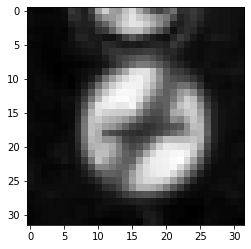

In [30]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'));

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray(X_test).reshape(-1,32,32,1)

In [36]:
X_train_gray.reshape(-1,32,32,1).shape

(34799, 32, 32, 1)

In [40]:
model = get_cnn_v5((32,32,1),num_classes)
model_trained =train_model(model, X_train_gray, y_train, params_fit = {})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
270/272 [============================>.] - ETA: 0s - loss: 3.0302 - accuracy: 0.1689

ValueError: ignored

In [0]:

def preproc_img(img):
  hsv= color.rgb2hsv(img)
  hsv[:,:, 2] = exposure.equalize_adapthist(hsv[:,:, 2])
  img = color.hsv2rgb(hsv)
  return img

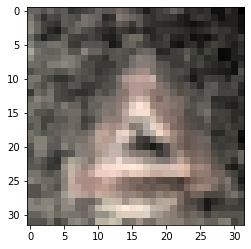

In [43]:
plt.imshow(preproc_img(X_train[400]))